### digit dataset

- Optical Recognition of Hadnwritten Digits Data Set
- 손 글씨로 쓴 숫자를 분류하는 데이터 셋
- MNIST가 원조, scikit-learn에서 8 by 8 image 제공

In [1]:
from sklearn import datasets

In [2]:
digit_dataset = datasets.load_digits()

In [4]:
digit_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digit_dataset["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digit_dataset['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digit_dataset['data'].shape

(1797, 64)

In [10]:
# 0 ~ 9 중 하나의 숫자임
digit_dataset['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

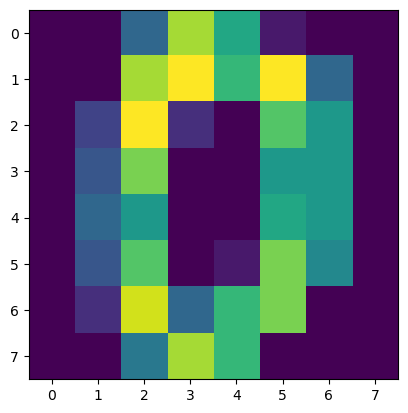

In [13]:
import matplotlib.pyplot as plt
plt.imshow(digit_dataset['images'][0])
plt.show()

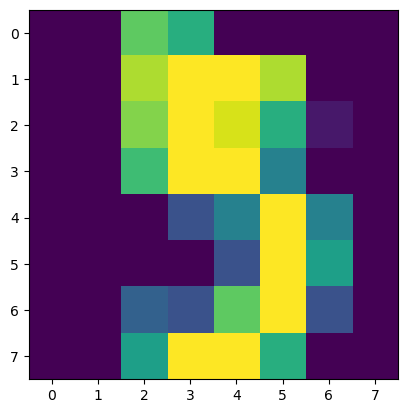

In [14]:
import matplotlib.pyplot as plt
plt.imshow(digit_dataset['images'][5])
plt.show()

In [20]:
X = digit_dataset['data']
y = digit_dataset['target']

In [21]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
y.shape

(1797,)

In [23]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
# ovr 방식과 softmax 방식으로 두 가지의 classifier을 만듦
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class='ovr')
logreg_softmax = LogisticRegression(multi_class='multinomial', solver='sag')

In [26]:
logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [27]:
y_pred = logreg_ovr.predict(X_test)
y_true = y_test

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[39,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  2,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 48,  0,  1],
       [ 0,  3,  0,  0,  1,  0,  1,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 33]])

In [30]:
# 각 class별로 보여줌
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.96      0.94        49
           2       1.00      0.98      0.99        48
           3       1.00      0.90      0.95        40
           4       0.91      1.00      0.95        42
           5       0.93      0.96      0.94        52
           6       0.98      0.98      0.98        46
           7       0.98      0.96      0.97        50
           8       0.93      0.89      0.91        47
           9       0.89      0.92      0.90        36

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [32]:
# ovr 방식의 accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.9533333333333334

In [35]:
# softmax 방식의 accuracy
y_pred = logreg_softmax.predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9711111111111111

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X, y, scoring='accuracy', cv=20, n_jobs=8).mean()

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.9453995006242195

In [37]:
cross_val_score(logreg_softmax, X, y, scoring='accuracy', cv=20, n_jobs=8).mean()

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

0.9487578027465666

In [41]:
# 그냥 하면 안 됨. micro, macro에 따라서 값이 다르게 나옴.
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average='macro')

0.9723505006523874

In [42]:
precision_score(y_true, y_pred, average='micro')

0.9711111111111111

### OneVsRestClassifier

In [43]:
from sklearn.multiclass import OneVsRestClassifier
y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.9533333333333334

In [45]:
# 클래스의 개수 만큼 모델을 만듦
OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).estimators_

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr')]

### OneVsOneClassifier

- 각각의 클래스마다 여러개의 모듈을 만듦
- ex) 10개의 클래스가 있으면 10C2개 만큼의 classifier가 만들어져서 투표를 하는 방식

In [46]:
from sklearn.multiclass import OneVsOneClassifier
y_pred = OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.9822222222222222

In [47]:
len(OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

45

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
# Compute confusion matrix
class_names = digit_dataset["target_names"]
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 34]])

Confusion matrix, without normalization
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  1  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  1]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 0  3  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  2  0  0  0 34]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.02 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.   0.   0.02]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.02 0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.   0.   0.06 0.   0.   0.   0.94]]


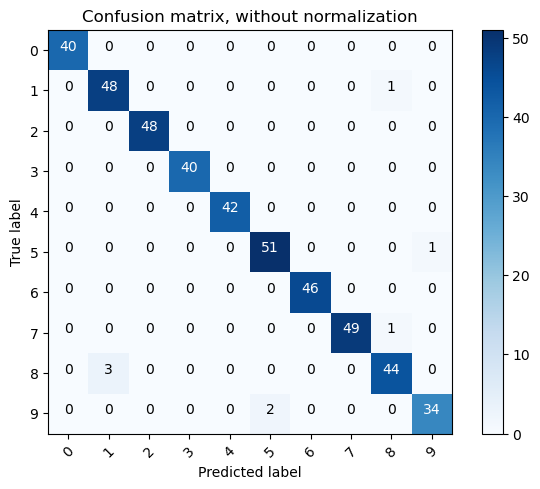

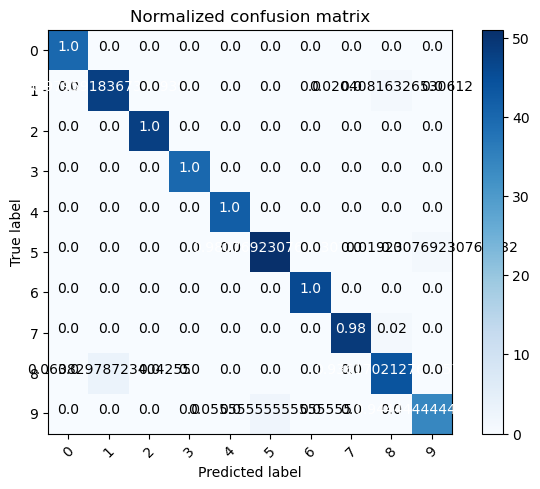

In [50]:
import numpy as np
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()